In [24]:
import numpy as np
import scipy
import poppy
if poppy.accel_math._USE_CUPY:
    import cupy as xp
    import cupyx.scipy as _scipy
else:
    xp = np
    _scipy = scipy
    
from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

# import zosapi
# from System import Enum,Int32,Double,Array
from pathlib import Path

from importlib import reload

# import logging, sys
# poppy_log = logging.getLogger('poppy')
# poppy_log.setLevel('DEBUG')
# logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

# poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import dm

from imshows import imshow1, imshow2, imshow3




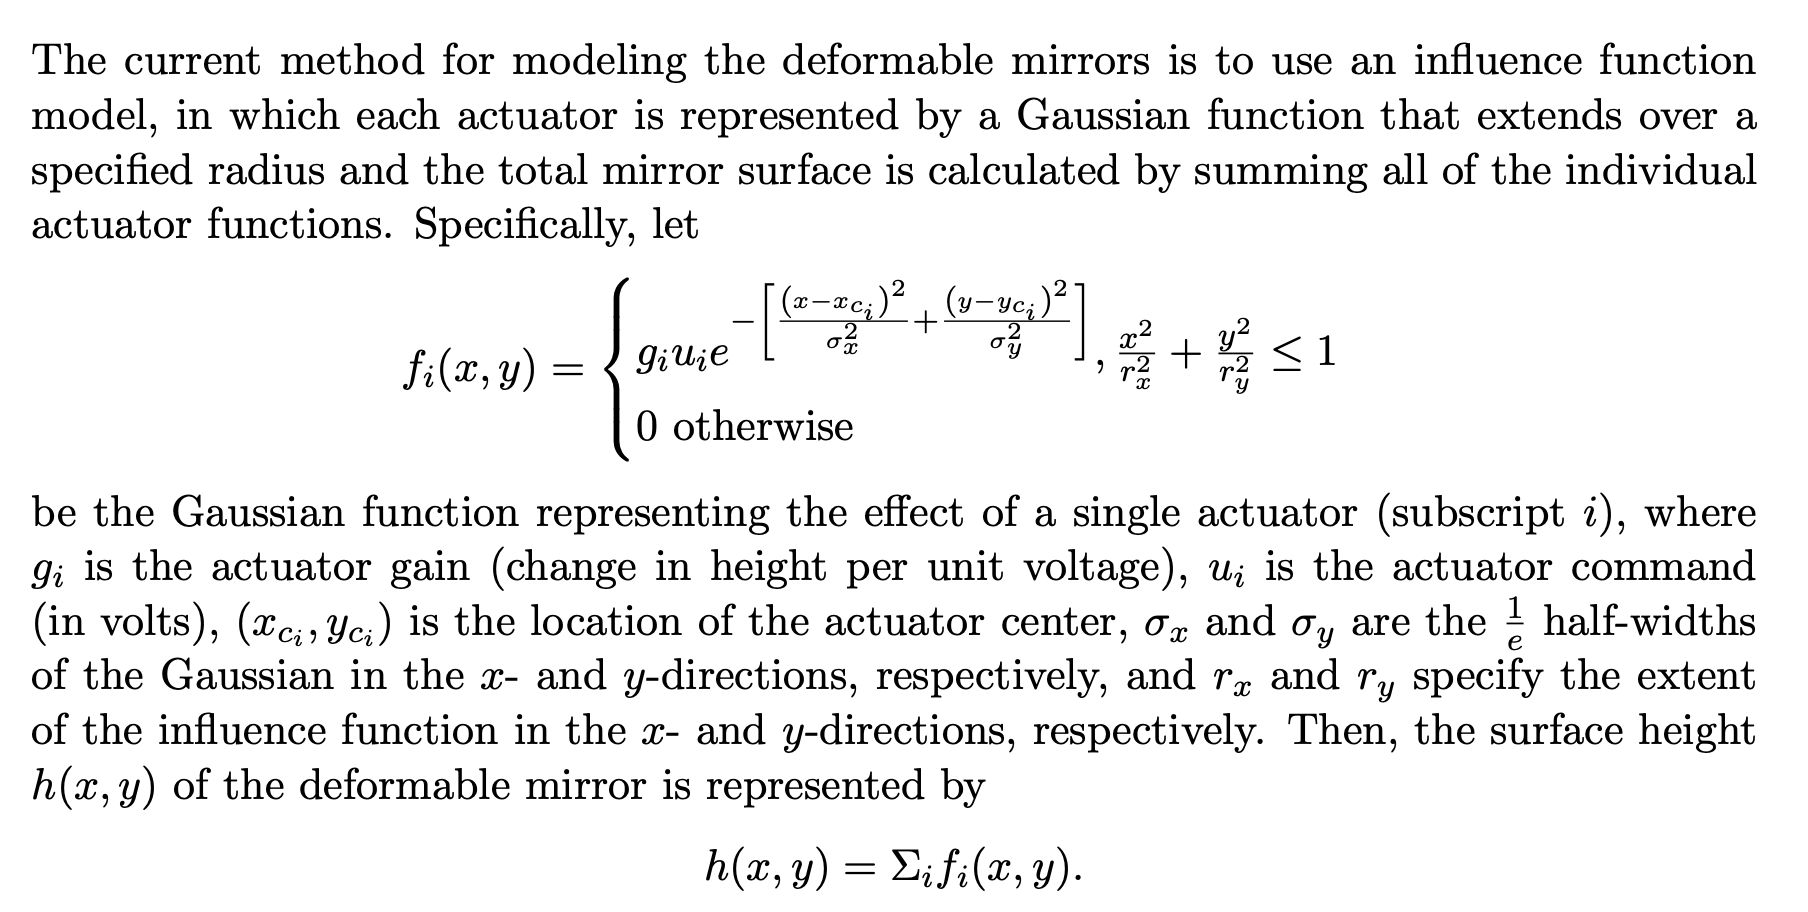

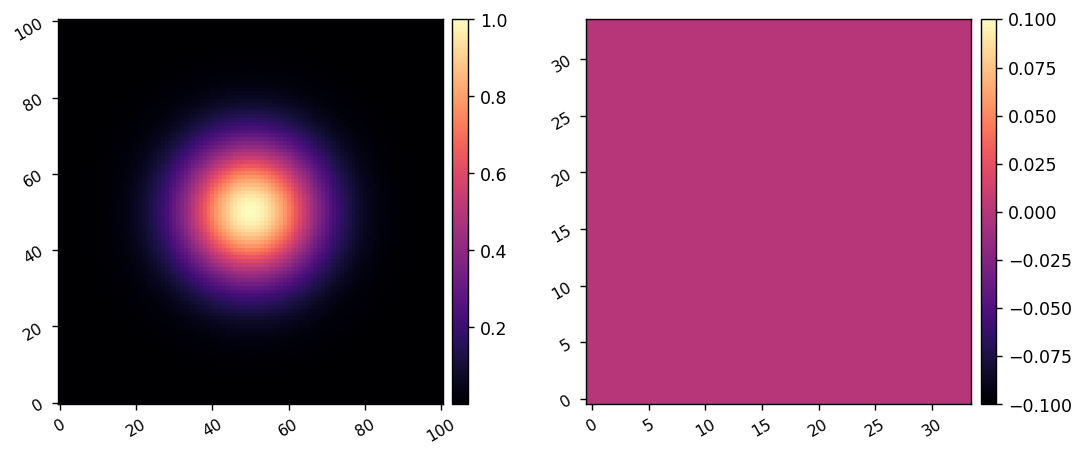

4.04


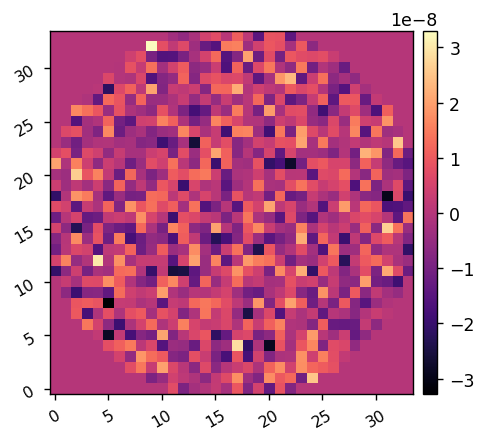

4.0 25
851 951


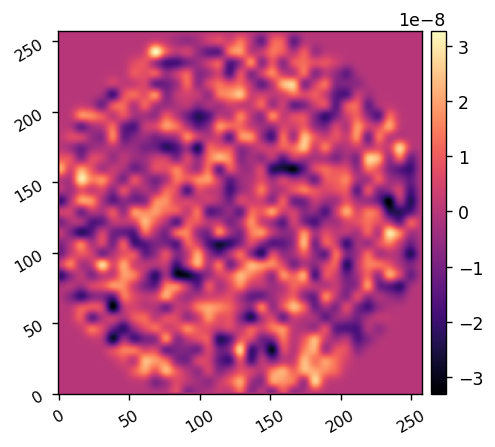

In [102]:
reload(dm)
DM = dm.DeformableMirror()
imshow2(DM.inf_fun, DM.command)
print(101/DM.inf_sampling)

DM.actuators = xp.random.randn(DM.Nacts)*1e-8
imshow1(DM.command)

dmsurf = DM.get_surface(256)
imshow1(dmsurf)

In [101]:
DM.inf_pixelscale

<Quantity 1.2e-05 m pix>

In [90]:
DM.inf_pixelscale

<Quantity 1.2e-05 m pix>

In [93]:
npix = 256*u.pix
active_diam = 10.2*u.mm
new_pixelscale = active_diam.to(u.m)/npix
new_pixelscale

<Quantity 3.984375e-05 m / pix>

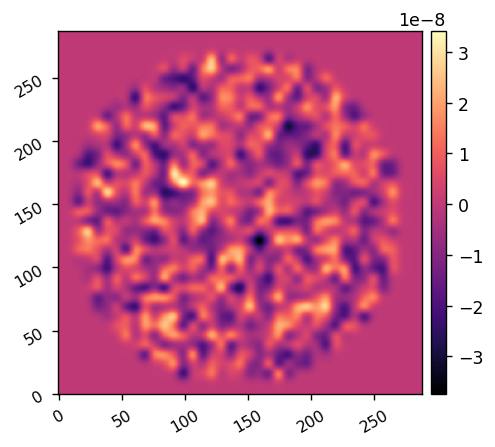

In [98]:
def interp_2d_array(arr, pixelscale, new_pixelscale):
    Nold = arr.shape[0]
    old_xmax = pixelscale * Nold/2

    x,y = xp.ogrid[-old_xmax:old_xmax-pixelscale:Nold*1j,
                   -old_xmax:old_xmax-pixelscale:Nold*1j]

    Nnew = int(np.ceil(2*old_xmax/new_pixelscale)) + 1
    new_xmax = new_pixelscale * Nnew/2

    newx,newy = xp.mgrid[-new_xmax:new_xmax-new_pixelscale:Nnew*1j,
                         -new_xmax:new_xmax-new_pixelscale:Nnew*1j]

    x0 = x[0,0]
    y0 = y[0,0]
    dx = x[1,0] - x0
    dy = y[0,1] - y0

    ivals = (newx - x0)/dx
    jvals = (newy - y0)/dy

    coords = xp.array([ivals, jvals])

    interped_arr = _scipy.ndimage.map_coordinates(arr, coords, order=3)
    return interped_arr

interped_surf = interp_2d_array(dmsurf, DM.inf_pixelscale.value, new_pixelscale.value)
imshow1(interped_surf)

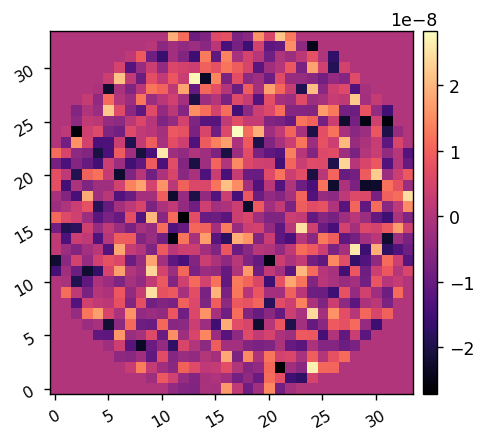

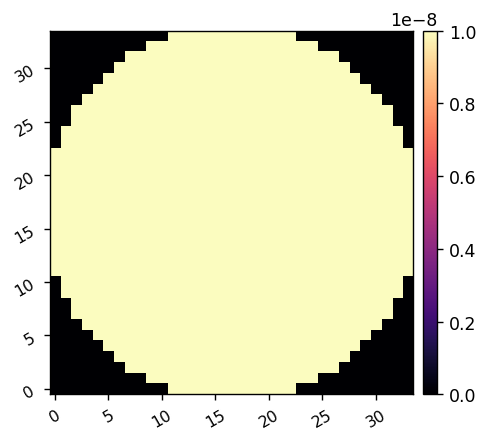

array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
      

In [99]:
DM.actuators = xp.random.randn(DM.Nacts)*1e-8
imshow1(DM.command)

DM.command = xp.ones_like(DM.dm_mask)*1e-8
imshow1(DM.command)

DM.actuators